<a href="https://colab.research.google.com/github/HVTrieuDuong/TRI-TUE-NHAN-TAO-HCMUTE/blob/main/flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.1,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
     

In [4]:
trainset='/content/drive/MyDrive/HCMUTE Cơ-điện tử/Trí tuệ nhân tạo/Flowers/'

In [5]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 1557 images belonging to 3 classes.
Found 172 images belonging to 3 classes.


In [6]:
validation_set.class_indices

{'daisy': 0, 'lotus': 1, 'rose': 2}

In [7]:
{'.ipynb_checkpoints': 0,
 'hoa cuc': 1,
 'hoa sen': 2,
 'hoa hong': 3,
 }

{'.ipynb_checkpoints': 0, 'hoa cuc': 1, 'hoa sen': 2, 'hoa hong': 3}

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
     

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
13/13 [==============================] - 328s 24s/step - loss: 6.1278 - accuracy: 0.4425 - val_loss: 0.9401 - val_accuracy: 0.4884
Epoch 2/50
13/13 [==============================] - 210s 16s/step - loss: 0.9473 - accuracy: 0.4804 - val_loss: 0.9020 - val_accuracy: 0.5814
Epoch 3/50
13/13 [==============================] - 199s 15s/step - loss: 0.9340 - accuracy: 0.5145 - val_loss: 0.8028 - val_accuracy: 0.6977
Epoch 4/50
13/13 [==============================] - 198s 15s/step - loss: 0.8939 - accuracy: 0.5421 - val_loss: 0.6875 - val_accuracy: 0.7151
Epoch 5/50
13/13 [==============================] - 204s 16s/step - loss: 0.7613 - accuracy: 0.6744 - val_loss: 0.7271 - val_accuracy: 0.6628
Epoch 6/50
13/13 [==============================] - 197s 15s/step - loss: 0.6942 - accuracy: 0.7148 - val_loss: 0.6590 - val_accuracy: 0.7093
Epoch 7/50
13/13 [==============================] - 194s 15s/step - loss: 0.6440 - accuracy: 0.7347 - val_loss: 0.5875 - val_accuracy: 0.7326
Epoch 

In [10]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 1557 images belonging to 3 classes.
Found 172 images belonging to 3 classes.


In [11]:
model.save('monan12.hs')

In [12]:
model1=load_model('monan12.hs')

In [23]:
label = ['0','lotus','rose','daisy']


1/1 [==============================] - 0s 53ms/step
lotus


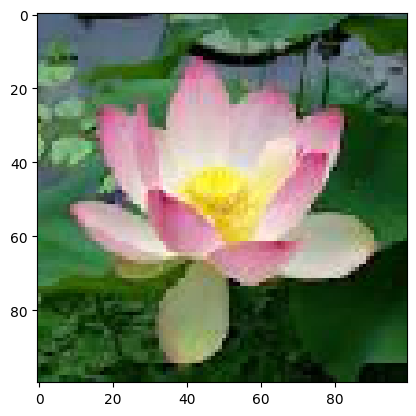

In [21]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/HCMUTE Cơ-điện tử/hoasen.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 49ms/step
rose


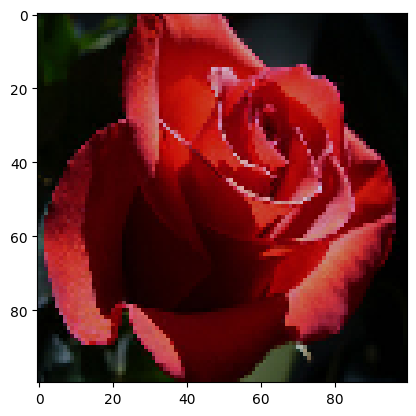

In [24]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/HCMUTE Cơ-điện tử/hoa hong.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])